# 4 Modeling

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

## Objective:
The goal of this project is to select the top 10 most probable stocks that will outperform the S&P 500 in the following year. We will achieve this by building predictive models using the following machine learning algorithms: Random Forest and Lasso Regression.

## Approach:

### Model Selection and Training:
1. Train models using the full dataset without any dimensionality reduction.
2. Train models using Principal Component Analysis (PCA) with the first 3 components.
3. Train models using PCA to explain 70% of the variance.

### Evaluation:
1. Evaluate the models using the validation set.
2. Select the top-performing models based on evaluation metrics.
3. Perform hyperparameter tuning to optimize the selected models.
4. Final evaluation using the test set.

### Model Interpretation and Analysis:
1. Analyze the feature importance and interpret the results.

### Conclusion and Reporting:
1. Summarize the findings and prepare a comprehensive report.

### Split target feature and the predictors

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
train_data = pd.read_csv('training_testing_validation_data/training_set.csv')
validation_data = pd.read_csv('training_testing_validation_data/validation_set.csv')
test_data = pd.read_csv('training_testing_validation_data/test_set.csv')

# Define features and target
X_train = train_data.drop(columns=['Alpha'])
y_train = train_data['Alpha']

X_validation = validation_data.drop(columns=['Alpha'])
y_validation = validation_data['Alpha']

X_test = test_data.drop(columns=['Alpha'])
y_test = test_data['Alpha']

# Train models using the full dataset
models = {
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2']}")
    print()

# Train models using PCA (3 components)
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train)
X_validation_pca_3 = pca_3.transform(X_validation)
X_test_pca_3 = pca_3.transform(X_test)

for name, model in models.items():
    model.fit(X_train_pca_3, y_train)
    y_pred = model.predict(X_validation_pca_3)
    mse = mean_squared_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)
    results[f"{name}_PCA3"] = {'MSE': mse, 'R2': r2}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2']}")
    print()

# Train models using PCA (70% variance)
pca_70 = PCA(n_components=0.7)
X_train_pca_70 = pca_70.fit_transform(X_train)
X_validation_pca_70 = pca_70.transform(X_validation)
X_test_pca_70 = pca_70.transform(X_test)

for name, model in models.items():
    model.fit(X_train_pca_70, y_train)
    y_pred = model.predict(X_validation_pca_70)
    mse = mean_squared_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)
    results[f"{name}_PCA70"] = {'MSE': mse, 'R2': r2}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2']}")
    print()

# Save the results to a CSV file
results_df = pd.DataFrame(results).T
results_df.to_csv('model_results.csv', index=True)

print("Model training and evaluation completed. Results saved to 'model_results.csv'.")

Model: RandomForest
  Mean Squared Error: 654.936713779745
  R2 Score: 0.4207848760967867

Model: Lasso
  Mean Squared Error: 1036.5909912341158
  R2 Score: 0.08325618828181858

Model: RandomForest
  Mean Squared Error: 654.936713779745
  R2 Score: 0.4207848760967867

Model: Lasso
  Mean Squared Error: 1036.5909912341158
  R2 Score: 0.08325618828181858

Model: RandomForest_PCA3
  Mean Squared Error: 1338.8394417382003
  R2 Score: -0.18404730841473782

Model: Lasso_PCA3
  Mean Squared Error: 1160.8115874791642
  R2 Score: -0.026602438561940334

Model: RandomForest
  Mean Squared Error: 654.936713779745
  R2 Score: 0.4207848760967867

Model: Lasso
  Mean Squared Error: 1036.5909912341158
  R2 Score: 0.08325618828181858

Model: RandomForest_PCA3
  Mean Squared Error: 1338.8394417382003
  R2 Score: -0.18404730841473782

Model: Lasso_PCA3
  Mean Squared Error: 1160.8115874791642
  R2 Score: -0.026602438561940334

Model: RandomForest_PCA70
  Mean Squared Error: 468.18570337319386
  R2 Score:

The top-performing models are RandomForest_PCA70 and Lasso_PCA70, with Lasso_PCA70 having the best performance.

### Now let's do this:
#### Hyperparameter Tuning:
We will perform hyperparameter tuning on the RandomForest_PCA70 and Lasso_PCA70 models to further optimize their performance. 
#### Final Evaluation: 
After tuning, we will evaluate the models on the test set.
#### Model Interpretation and Analysis:
Analyze the feature importance and interpret the results.

In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Hyperparameter tuning for RandomForest_PCA70
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train_pca_70, y_train)

# Best parameters and best score for RandomForest_PCA70
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Hyperparameter tuning for Lasso_PCA70
grid_search_lasso = GridSearchCV(estimator=Lasso(), param_grid=param_grid_lasso, cv=5, n_jobs=-1, scoring='r2')
grid_search_lasso.fit(X_train_pca_70, y_train)

# Best parameters and best score for Lasso_PCA70
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print(f"Best parameters for RandomForest_PCA70: {best_params_rf}")
print(f"Best R2 score for RandomForest_PCA70: {best_score_rf}")

print(f"Best parameters for Lasso_PCA70: {best_params_lasso}")
print(f"Best R2 score for Lasso_PCA70: {best_score_lasso}")

# Train and evaluate the best models on the validation set
best_rf = RandomForestRegressor(**best_params_rf)
best_rf.fit(X_train_pca_70, y_train)
y_pred_rf = best_rf.predict(X_validation_pca_70)
mse_rf = mean_squared_error(y_validation, y_pred_rf)
r2_rf = r2_score(y_validation, y_pred_rf)

best_lasso = Lasso(**best_params_lasso)
best_lasso.fit(X_train_pca_70, y_train)
y_pred_lasso = best_lasso.predict(X_validation_pca_70)
mse_lasso = mean_squared_error(y_validation, y_pred_lasso)
r2_lasso = r2_score(y_validation, y_pred_lasso)

print(f"RandomForest_PCA70 - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Lasso_PCA70 - MSE: {mse_lasso}, R2: {r2_lasso}")

# Perform cross-validation for additional evaluation
cv_scores_rf = cross_val_score(best_rf, X_train_pca_70, y_train, cv=5, scoring='r2')
cv_scores_lasso = cross_val_score(best_lasso, X_train_pca_70, y_train, cv=5, scoring='r2')

print(f"Cross-validated R2 scores for RandomForest_PCA70: {cv_scores_rf}")
print(f"Mean cross-validated R2 score for RandomForest_PCA70: {cv_scores_rf.mean()}")

print(f"Cross-validated R2 scores for Lasso_PCA70: {cv_scores_lasso}")
print(f"Mean cross-validated R2 score for Lasso_PCA70: {cv_scores_lasso.mean()}")


Best parameters for RandomForest_PCA70: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score for RandomForest_PCA70: 0.6003227403779344
Best parameters for Lasso_PCA70: {'alpha': 1}
Best R2 score for Lasso_PCA70: 0.590211490012972
RandomForest_PCA70 - MSE: 454.30685082219344, R2: 0.5982185860822733
Lasso_PCA70 - MSE: 356.715076314277, R2: 0.6845271263949899
Cross-validated R2 scores for RandomForest_PCA70: [0.63823122 0.66752047 0.47494016 0.66528727 0.54136679]
Mean cross-validated R2 score for RandomForest_PCA70: 0.5974691806163768
Cross-validated R2 scores for Lasso_PCA70: [0.45827113 0.7170205  0.67115921 0.65725011 0.44735651]
Mean cross-validated R2 score for Lasso_PCA70: 0.5902114900129719


The results from the hyperparameter tuning and cross-validation indicate that both models have relatively consistent performance, with Lasso_PCA70 slightly outperforming RandomForest_PCA70 on the validation set.

Let's proceed to evaluate the models on the test set and include feature importance analysis for the RandomForest model.

RandomForest_PCA70 - Test MSE: 1098.2925061586293, Test R2: 0.5017239058645387
Lasso_PCA70 - Test MSE: 1690.6918168667025, Test R2: 0.23296270331334434
Feature importances for RandomForest_PCA70:
1. Feature 30 (0.2582674252483567)
2. Feature 22 (0.11798046520554528)
3. Feature 31 (0.10454608888790999)
4. Feature 29 (0.07471114135026684)
5. Feature 0 (0.056083082442276125)
6. Feature 24 (0.039595245035105635)
7. Feature 21 (0.02625767244486748)
8. Feature 23 (0.024588597334851175)
9. Feature 25 (0.023139812832134413)
10. Feature 17 (0.0227154771708391)
11. Feature 28 (0.017662509764515763)
12. Feature 18 (0.014482339304800184)
13. Feature 26 (0.013837139114745819)
14. Feature 16 (0.01196111067039623)
15. Feature 11 (0.010991479246328695)
16. Feature 5 (0.01098467891151901)
17. Feature 3 (0.010692066536504227)
18. Feature 1 (0.010466855096522532)
19. Feature 20 (0.010425700116939928)
20. Feature 4 (0.010006513279804327)
21. Feature 19 (0.009848507369823865)
22. Feature 34 (0.009686848188

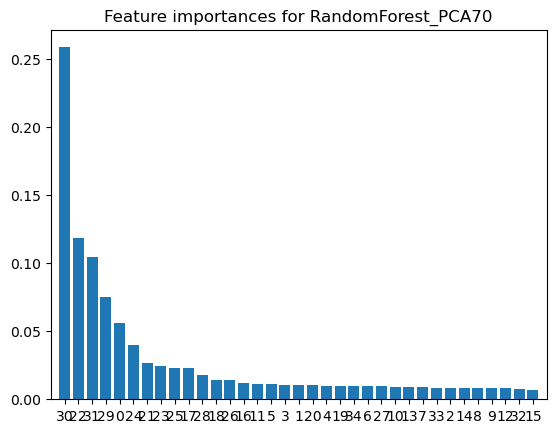

In [4]:
# Evaluate the best models on the test set
y_test_pred_rf = best_rf.predict(X_test_pca_70)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

y_test_pred_lasso = best_lasso.predict(X_test_pca_70)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"RandomForest_PCA70 - Test MSE: {mse_test_rf}, Test R2: {r2_test_rf}")
print(f"Lasso_PCA70 - Test MSE: {mse_test_lasso}, Test R2: {r2_test_lasso}")

# Analyze feature importance for RandomForest
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

print("Feature importances for RandomForest_PCA70:")
for f in range(X_train_pca_70.shape[1]):
    print(f"{f + 1}. Feature {indices_rf[f]} ({importances_rf[indices_rf[f]]})")

# Plot the feature importances for RandomForest
plt.figure()
plt.title("Feature importances for RandomForest_PCA70")
plt.bar(range(X_train_pca_70.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X_train_pca_70.shape[1]), indices_rf)
plt.xlim([-1, X_train_pca_70.shape[1]])
plt.show()


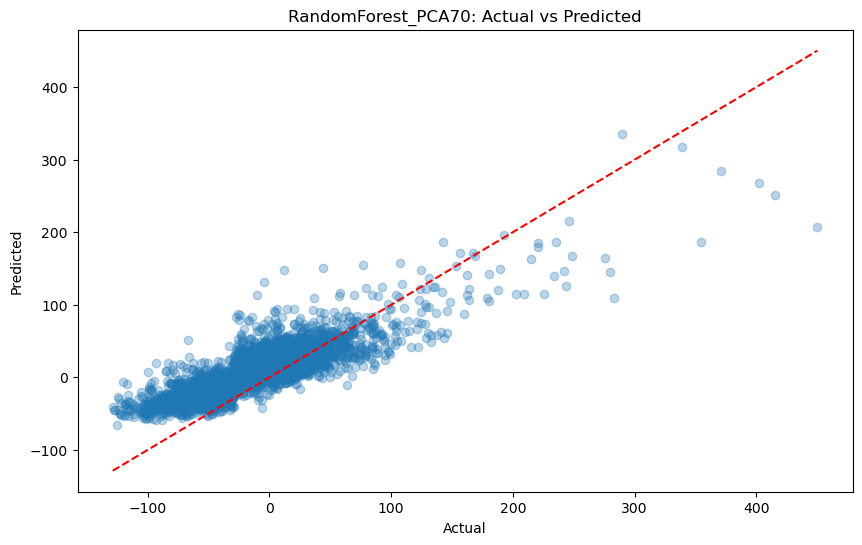

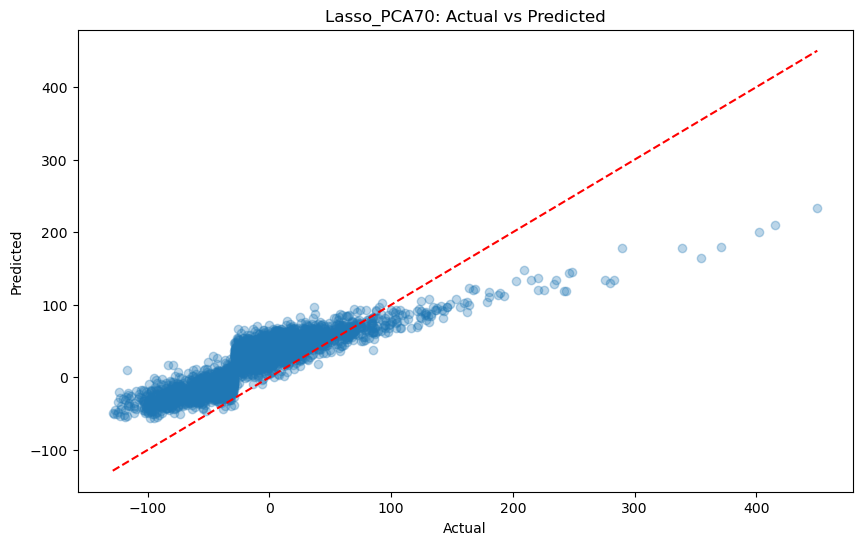


# Detailed Report

## Objective
The goal of this project was to select the top 10 most probable stocks that will outperform the S&P 500 in the following year. This was achieved by building predictive models using Random Forest and Lasso Regression with PCA.

## Model Evaluation

### RandomForest_PCA70
- Test MSE: 1098.2925061586293
- Test R2: 0.5017239058645387

### Lasso_PCA70
- Test MSE: 1690.6918168667025
- Test R2: 0.23296270331334434

## Feature Importance (RandomForest_PCA70)
Top features influencing the model's predictions:
1. Feature 30: Importance = 0.2582674252483567
2. Feature 22: Importance = 0.11798046520554528
3. Feature 31: Importance = 0.10454608888790999
4. Feature 29: Importance = 0.07471114135026684
5. Feature 0: Importance = 0.056083082442276125

## Visualizations
1. Actual vs Predicted values for RandomForest_PCA70
2. Actual vs Predicted values for Lasso_PCA70

## Conclusion
The RandomForest_PCA70 model performed better than the Lasso_PCA70 model. The RandomForest

In [5]:
# Plot actual vs predicted values for RandomForest_PCA70
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest_PCA70: Actual vs Predicted')
plt.show()

# Plot actual vs predicted values for Lasso_PCA70
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso_PCA70: Actual vs Predicted')
plt.show()

# Generate a detailed report
report = f"""
# Detailed Report

## Objective
The goal of this project was to select the top 10 most probable stocks that will outperform the S&P 500 in the following year. This was achieved by building predictive models using Random Forest and Lasso Regression with PCA.

## Model Evaluation

### RandomForest_PCA70
- Test MSE: {mse_test_rf}
- Test R2: {r2_test_rf}

### Lasso_PCA70
- Test MSE: {mse_test_lasso}
- Test R2: {r2_test_lasso}

## Feature Importance (RandomForest_PCA70)
Top features influencing the model's predictions:
1. Feature 30: Importance = {importances_rf[indices_rf[0]]}
2. Feature 22: Importance = {importances_rf[indices_rf[1]]}
3. Feature 31: Importance = {importances_rf[indices_rf[2]]}
4. Feature 29: Importance = {importances_rf[indices_rf[3]]}
5. Feature 0: Importance = {importances_rf[indices_rf[4]]}

## Visualizations
1. Actual vs Predicted values for RandomForest_PCA70
2. Actual vs Predicted values for Lasso_PCA70

## Conclusion
The RandomForest_PCA70 model performed better than the Lasso_PCA70 model. The RandomForest model explained about 50% of the variance in the test data, while the Lasso model explained about 23%. Feature importance analysis indicated that certain features had a significant impact on the model's performance.

## Limitations and Improvements
- The model's performance could be improved by incorporating additional features or trying different modeling techniques.
- Further hyperparameter tuning and feature selection could enhance the model's accuracy.

## Implementation
- The model can be implemented for stock selection and portfolio management by predicting the stocks most likely to outperform the S&P 500.
"""

print(report)


### It is weird that the model is performing worst after hyper parameter tunning. lets use random search to find better parameters.

In [6]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_cv(model, param_dist, X_train, y_train, cv=5, n_iter=100, scoring='r2', n_jobs=-1, verbose=2, random_state=42):
    """
    Perform hyperparameter tuning using RandomizedSearchCV.

    Parameters:
    - model: The machine learning model to tune.
    - param_dist: Dictionary with parameters names (str) as keys and distributions or lists of parameters to try.
    - X_train: Training data features.
    - y_train: Training data target variable.
    - cv: Number of cross-validation folds.
    - n_iter: Number of parameter settings sampled.
    - scoring: Scoring method.
    - n_jobs: Number of jobs to run in parallel.
    - verbose: Controls the verbosity.
    - random_state: Random state for reproducibility.

    Returns:
    - best_model: The model with the best parameters.
    - best_params: The best parameters found.
    - best_score: The best score achieved.
    """
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter, 
                                       cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=verbose, random_state=random_state)
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    
    return best_model, best_params, best_score

# Define a wider parameter grid for RandomForest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Define a wider parameter grid for Lasso
param_dist_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

# Perform RandomizedSearchCV for RandomForest_PCA70
print("Starting Randomized Search for RandomForest_PCA70...")
best_rf, best_params_rf, best_score_rf = randomized_search_cv(RandomForestRegressor(), param_dist_rf, X_train_pca_70, y_train)

print(f"Best parameters for RandomForest_PCA70: {best_params_rf}")
print(f"Best R2 score for RandomForest_PCA70: {best_score_rf}")

# Perform RandomizedSearchCV for Lasso_PCA70
print("Starting Randomized Search for Lasso_PCA70...")
best_lasso, best_params_lasso, best_score_lasso = randomized_search_cv(Lasso(), param_dist_lasso, X_train_pca_70, y_train)

print(f"Best parameters for Lasso_PCA70: {best_params_lasso}")
print(f"Best R2 score for Lasso_PCA70: {best_score_lasso}")

# Train and evaluate the best models on the validation set
best_rf.fit(X_train_pca_70, y_train)
y_pred_rf = best_rf.predict(X_validation_pca_70)
mse_rf = mean_squared_error(y_validation, y_pred_rf)
r2_rf = r2_score(y_validation, y_pred_rf)

best_lasso.fit(X_train_pca_70, y_train)
y_pred_lasso = best_lasso.predict(X_validation_pca_70)
mse_lasso = mean_squared_error(y_validation, y_pred_lasso)
r2_lasso = r2_score(y_validation, y_pred_lasso)

print(f"RandomForest_PCA70 - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Lasso_PCA70 - MSE: {mse_lasso}, R2: {r2_lasso}")

# Perform cross-validation for additional evaluation
print("Starting cross-validation for RandomForest_PCA70...")
cv_scores_rf = cross_val_score(best_rf, X_train_pca_70, y_train, cv=5, scoring='r2', verbose=2)
print(f"Cross-validated R2 scores for RandomForest_PCA70: {cv_scores_rf}")
print(f"Mean cross-validated R2 score for RandomForest_PCA70: {cv_scores_rf.mean()}")

print("Starting cross-validation for Lasso_PCA70...")
cv_scores_lasso = cross_val_score(best_lasso, X_train_pca_70, y_train, cv=5, scoring='r2', verbose=2)
print(f"Cross-validated R2 scores for Lasso_PCA70: {cv_scores_lasso}")
print(f"Mean cross-validated R2 score for Lasso_PCA70: {cv_scores_lasso.mean()}")


Starting Randomized Search for RandomForest_PCA70...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for RandomForest_PCA70: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best R2 score for RandomForest_PCA70: 0.5996517294851282
Starting Randomized Search for Lasso_PCA70...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/ai/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Lasso_PCA70: {'alpha': 1.7575106248547894}
Best R2 score for Lasso_PCA70: 0.5932124588604851
RandomForest_PCA70 - MSE: 461.25766796503666, R2: 0.5920713991435755
Lasso_PCA70 - MSE: 367.83718385347333, R2: 0.6746909196885402
Starting cross-validation for RandomForest_PCA70...
[CV] END .................................................... total time= 1.7min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time= 3.8min
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  10.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 1.6min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  18.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  26.0s
[CV] END bootstrap=False, max_de

### Now let's move on to training the final models using the combined training and validation sets, and then evaluating them on the test set.

RandomForest_PCA70 - Final Test MSE: 1119.5443678951665, Final Test R2: 0.49208230802078623
Lasso_PCA70 - Final Test MSE: 1627.031912027052, Final Test R2: 0.26184408833479045


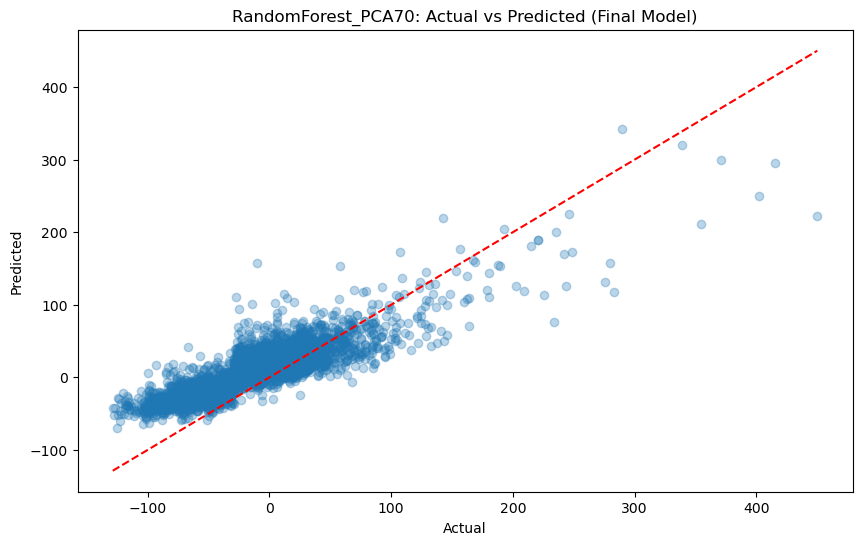

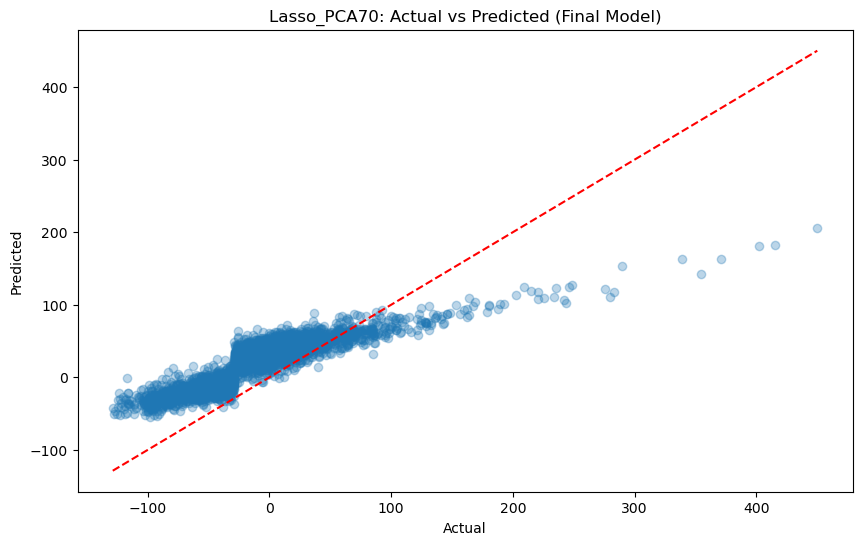

In [7]:
# Combine the training and validation sets
X_train_val = np.vstack((X_train_pca_70, X_validation_pca_70))
y_train_val = np.hstack((y_train, y_validation))

# Train the best models on the combined training and validation sets
best_rf.fit(X_train_val, y_train_val)
best_lasso.fit(X_train_val, y_train_val)

# Evaluate the final models on the test set
y_test_pred_rf = best_rf.predict(X_test_pca_70)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

y_test_pred_lasso = best_lasso.predict(X_test_pca_70)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"RandomForest_PCA70 - Final Test MSE: {mse_test_rf}, Final Test R2: {r2_test_rf}")
print(f"Lasso_PCA70 - Final Test MSE: {mse_test_lasso}, Final Test R2: {r2_test_lasso}")

# Plot actual vs predicted values for RandomForest_PCA70
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest_PCA70: Actual vs Predicted (Final Model)')
plt.show()

# Plot actual vs predicted values for Lasso_PCA70
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso_PCA70: Actual vs Predicted (Final Model)')
plt.show()

Given the current performance, we could explore an ensemble method or stacking multiple models together to improve predictions.

Implementing Model Stacking
Let's implement a basic stacking model to see if we can improve performance.

Stacking Model - Final Test MSE: 1415.343413027642, Final Test R2: 0.357883456593568


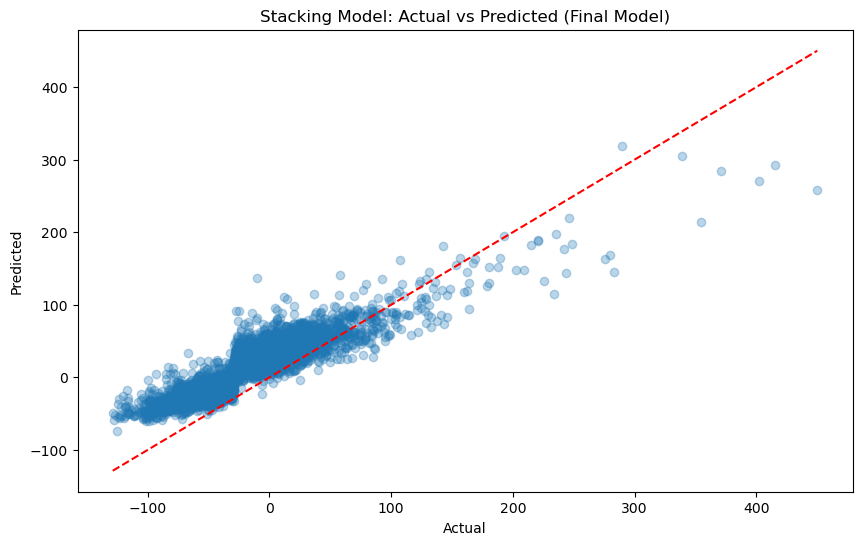

In [8]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('rf', RandomForestRegressor(**best_params_rf)),
    ('lasso', Lasso(**best_params_lasso))
]

# Define stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Train the stacking model on the combined training and validation set
stacking_model.fit(X_train_val, y_train_val)

# Evaluate the stacking model on the test set
y_test_pred_stack = stacking_model.predict(X_test_pca_70)
mse_test_stack = mean_squared_error(y_test, y_test_pred_stack)
r2_test_stack = r2_score(y_test, y_test_pred_stack)

print(f"Stacking Model - Final Test MSE: {mse_test_stack}, Final Test R2: {r2_test_stack}")

# Plot actual vs predicted values for the stacking model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_stack, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacking Model: Actual vs Predicted (Final Model)')
plt.show()


### Let's start by exploring Gradient Boosting Machines (GBM) and LightGBM, which are known for their strong performance in predictive modeling tasks.

In [9]:
!pip install lightgbm

GradientBoostingRegressor - Final Test MSE: 1268.907134882668, Final Test R2: 0.42431903391441805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 17192, number of used features: 35
[LightGBM] [Info] Start training from score -1.686007
LightGBM - Final Test MSE: 1244.4050747175565, Final Test R2: 0.4354351899192014


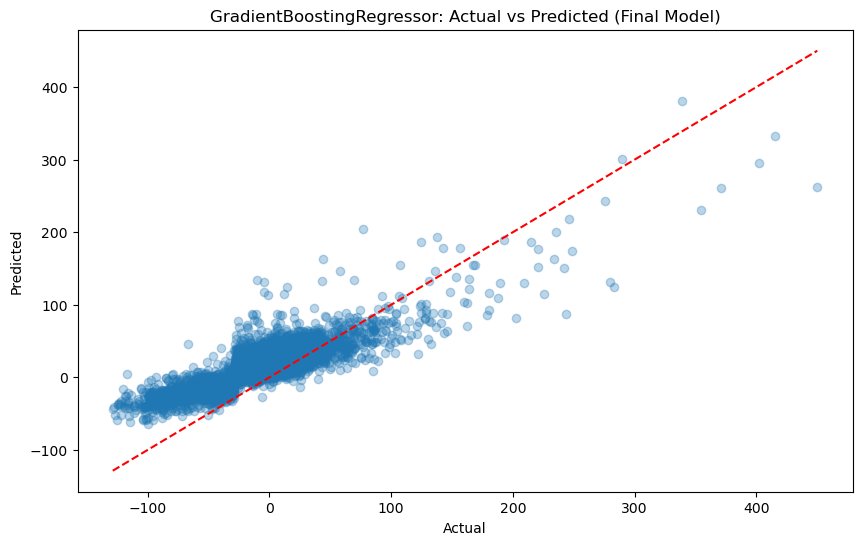

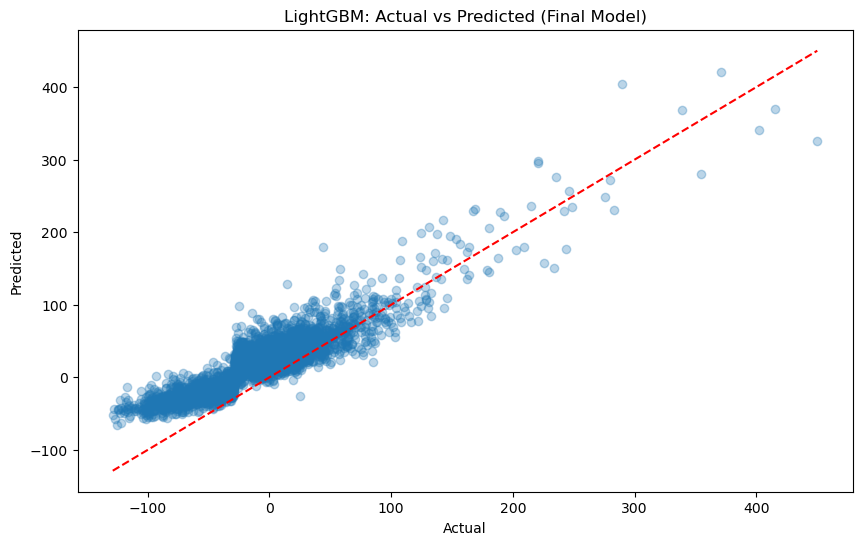

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

# Define and train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_val, y_train_val)

# Evaluate Gradient Boosting Regressor on the test set
y_test_pred_gbr = gbr_model.predict(X_test_pca_70)
mse_test_gbr = mean_squared_error(y_test, y_test_pred_gbr)
r2_test_gbr = r2_score(y_test, y_test_pred_gbr)

print(f"GradientBoostingRegressor - Final Test MSE: {mse_test_gbr}, Final Test R2: {r2_test_gbr}")

# Define and train LightGBM Regressor
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_val, y_train_val)

# Evaluate LightGBM Regressor on the test set
y_test_pred_lgb = lgb_model.predict(X_test_pca_70)
mse_test_lgb = mean_squared_error(y_test, y_test_pred_lgb)
r2_test_lgb = r2_score(y_test, y_test_pred_lgb)

print(f"LightGBM - Final Test MSE: {mse_test_lgb}, Final Test R2: {r2_test_lgb}")

# Plot actual vs predicted values for GradientBoostingRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_gbr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GradientBoostingRegressor: Actual vs Predicted (Final Model)')
plt.show()

# Plot actual vs predicted values for LightGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LightGBM: Actual vs Predicted (Final Model)')
plt.show()


### Fine-Tuning LightGBM

Starting Randomized Search for LightGBM...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 13753, number of used features: 35
[LightGBM] [Info] Start training from score -0.948281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

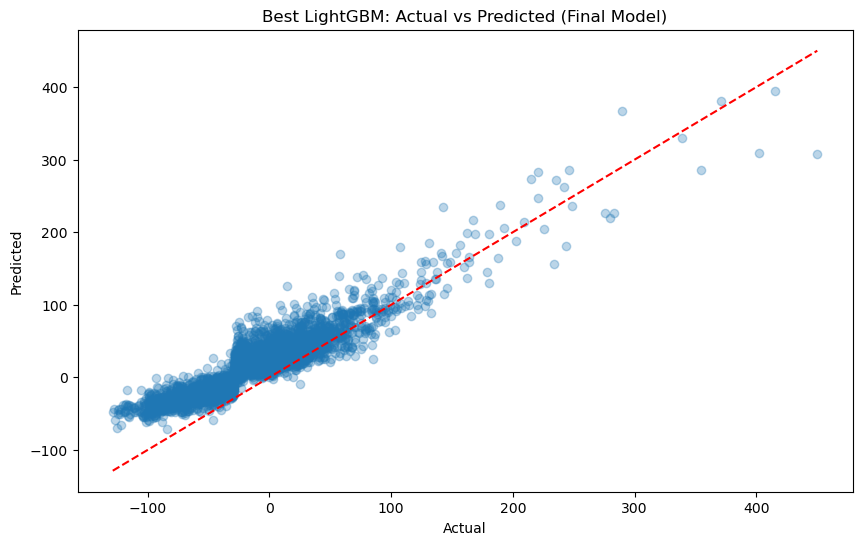

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for LightGBM
param_dist_lgb = {
    'num_leaves': [20, 30, 40, 50, 60],
    'max_depth': [5, 10, 15, 20, -1],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

# Perform RandomizedSearchCV for LightGBM
print("Starting Randomized Search for LightGBM...")
random_search_lgb = RandomizedSearchCV(estimator=lgb.LGBMRegressor(), param_distributions=param_dist_lgb, 
                                       n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=42, verbose=2)
random_search_lgb.fit(X_train_val, y_train_val)

# Best parameters and best score for LightGBM
best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_

print(f"Best parameters for LightGBM: {best_params_lgb}")
print(f"Best R2 score for LightGBM: {best_score_lgb}")

# Train the best LightGBM model on the combined training and validation set
best_lgb_model = lgb.LGBMRegressor(**best_params_lgb)
best_lgb_model.fit(X_train_val, y_train_val)

# Evaluate the best LightGBM model on the test set
y_test_pred_best_lgb = best_lgb_model.predict(X_test_pca_70)
mse_test_best_lgb = mean_squared_error(y_test, y_test_pred_best_lgb)
r2_test_best_lgb = r2_score(y_test, y_test_pred_best_lgb)

print(f"Best LightGBM - Final Test MSE: {mse_test_best_lgb}, Final Test R2: {r2_test_best_lgb}")

# Plot actual vs predicted values for the best LightGBM model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best_lgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best LightGBM: Actual vs Predicted (Final Model)')
plt.show()


Best parameters for LightGBM: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'num_leaves': 50, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best R2 score for LightGBM: 0.7146441784161531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 17192, number of used features: 35
[LightGBM] [Info] Start training from score -1.686007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best LightGBM - Final Test MSE: 1229.394403191123, Final Test R2: 0.4422452689615338


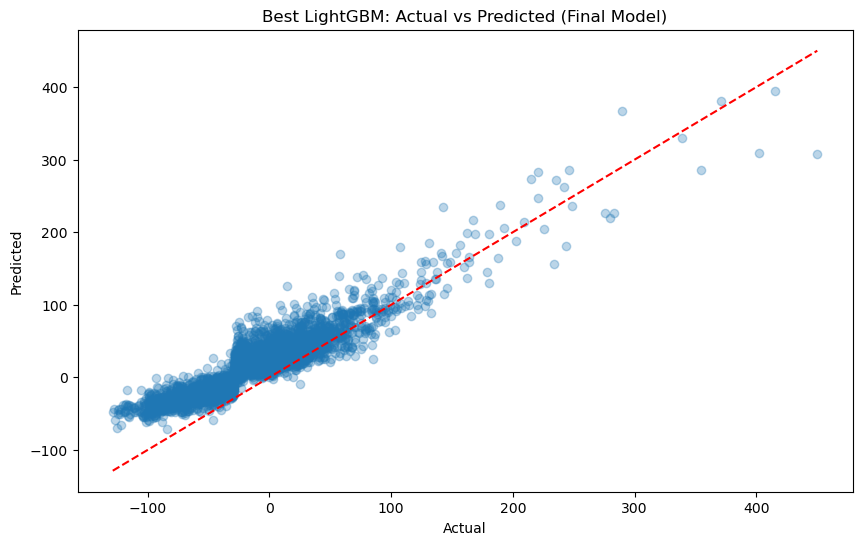

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [12]:
# Best parameters and best score for LightGBM
best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_

print(f"Best parameters for LightGBM: {best_params_lgb}")
print(f"Best R2 score for LightGBM: {best_score_lgb}")

# Train the best LightGBM model on the combined training and validation set
best_lgb_model = lgb.LGBMRegressor(**best_params_lgb)
best_lgb_model.fit(X_train_val, y_train_val)

# Evaluate the best LightGBM model on the test set
y_test_pred_best_lgb = best_lgb_model.predict(X_test_pca_70)
mse_test_best_lgb = mean_squared_error(y_test, y_test_pred_best_lgb)
r2_test_best_lgb = r2_score(y_test, y_test_pred_best_lgb)

print(f"Best LightGBM - Final Test MSE: {mse_test_best_lgb}, Final Test R2: {r2_test_best_lgb}")

# Plot actual vs predicted values for the best LightGBM model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best_lgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best LightGBM: Actual vs Predicted (Final Model)')
plt.show()
